In [2]:
#importing all the necessary packages
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np
import matplotlib.pyplot as plt

In [18]:
#For CIFAR-10, we get 5 training data batches: 'data_batch_1 -'data_batch_5'  files,
#a test data batch 'test_batch' file and a ‘batch.meta’ file.Each of these files is a Python "pickled" object produced with cPickle.
#To open these files we use bellow Python3 routine.
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

In [4]:
#reading the training batch and testing from the file location and calling the unpickle() function
file1 = r'C:\Users\zakri\OneDrive\Desktop\6sem\ds\cifar-10-batches-py\data_batch_1'
data_batch_1 = unpickle(file1)

file2= r'C:\Users\zakri\OneDrive\Desktop\6sem\ds\cifar-10-batches-py\test_batch'
test_batch=unpickle(file6)

In [58]:
#The whole data_batch_1 has 10,000 images.
#And each image is a 1-D array having 3,072 entries.
#First 1024 entries for Red, the next 1024 entries for Green and last 1024 entries for Blue channels.
X_train = data_batch_1['data']
print(X_train.shape)
y_train=data_batch_1['labels']

(10000, 3072)


In [ ]:
X_test = test_batch['data']
y_test= test_batch['labels']

In [26]:
#Normalization is a common step of image pre-processing.This is essential to maintain the pixels of all the images within a uniform range.
X_train = X_train/255.0
X_test = X_test/255.0

RANDOM FOREST CLASSIFIER

In [27]:
#Creating a random forest classifier model
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [28]:
#Testing the model
y_pred=model.predict(X_test)
y_pred

array([3, 0, 8, ..., 5, 5, 7])

In [61]:
#Printing the accuracy and Classification report of the model
print("Accuracy of Random Forest classifier:",accuracy_score(y_pred,y_test))
print()
print(classification_report(y_pred,y_test))

Accuracy of Random Forest classifier: 0.4237

              precision    recall  f1-score   support

           0       0.51      0.49      0.50      1051
           1       0.51      0.48      0.49      1072
           2       0.28      0.33      0.30       857
           3       0.24      0.34      0.29       711
           4       0.38      0.35      0.36      1061
           5       0.37      0.36      0.36      1039
           6       0.48      0.44      0.46      1112
           7       0.38      0.46      0.41       825
           8       0.57      0.55      0.56      1044
           9       0.52      0.42      0.46      1228

    accuracy                           0.42     10000
   macro avg       0.42      0.42      0.42     10000
weighted avg       0.44      0.42      0.43     10000



In [38]:
#Confusion matrix for Random forest classifier
cm=confusion_matrix(y_pred,y_test)
print(cm)

[[511  40 112  58  63  47  17  59 103  41]
 [ 44 511  42  47  19  36  44  45 100 184]
 [ 63  12 279  67 148  94  95  54  19  26]
 [ 17  31  56 244  47 134  73  52  20  37]
 [ 27  23 175  87 375  78 136 120  18  22]
 [ 31  48  91 198  55 369  65 111  43  28]
 [ 25  48 118 121 159  77 484  43  13  24]
 [ 27  31  60  75  76  91  26 377  19  43]
 [185  61  33  25  28  33   6  27 569  77]
 [ 70 195  34  78  30  41  54 112  96 518]]


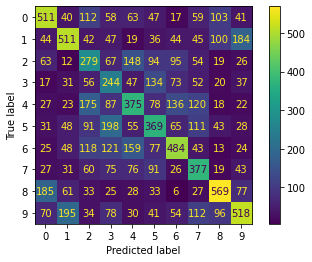

In [64]:
#Displaying the confusion matrix
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

In [67]:
#ROC curve for Random Forest Classifier
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred,pos_label=1)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Area under the curve:",roc_auc)

Area under the curve: 0.40900872222222223


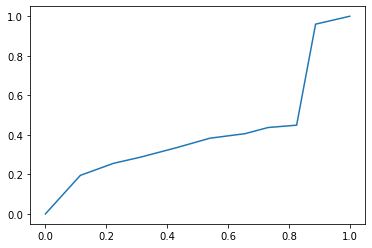

In [68]:
#Displaying the ROC curve 
plt.plot(false_positive_rate,true_positive_rate)

KNN CLASSIFIER

In [31]:
#Creating a KNN classifier model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:
#Testing the model
y_pred1=knn.predict(X_test)
y_pred1

array([2, 8, 8, ..., 5, 3, 4])

In [62]:
#Printing the accuracy and Classification report of the model
print("Accuracy of KNN classifier:",accuracy_score(y_pred1,y_test))
print()
print(classification_report(y_pred1,y_test))

Accuracy of KNN classifier: 0.29

              precision    recall  f1-score   support

           0       0.55      0.28      0.37      1976
           1       0.20      0.50      0.28       389
           2       0.45      0.18      0.26      2485
           3       0.18      0.24      0.21       742
           4       0.40      0.23      0.29      1753
           5       0.15      0.38      0.22       390
           6       0.20      0.34      0.25       592
           7       0.13      0.67      0.21       191
           8       0.58      0.42      0.49      1363
           9       0.08      0.68      0.14       119

    accuracy                           0.29     10000
   macro avg       0.29      0.39      0.27     10000
weighted avg       0.41      0.29      0.31     10000



In [47]:
#Confusion matrix for KNN classifier
cm1=confusion_matrix(y_pred1,y_test)
print(cm)

[[511  40 112  58  63  47  17  59 103  41]
 [ 44 511  42  47  19  36  44  45 100 184]
 [ 63  12 279  67 148  94  95  54  19  26]
 [ 17  31  56 244  47 134  73  52  20  37]
 [ 27  23 175  87 375  78 136 120  18  22]
 [ 31  48  91 198  55 369  65 111  43  28]
 [ 25  48 118 121 159  77 484  43  13  24]
 [ 27  31  60  75  76  91  26 377  19  43]
 [185  61  33  25  28  33   6  27 569  77]
 [ 70 195  34  78  30  41  54 112  96 518]]


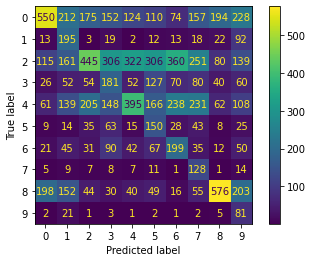

In [63]:
#Displaying the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1)
cm_display.plot()
plt.show()

In [72]:
#ROC curve for KNN Classifier
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred1,pos_label=0)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Area under the curve:",roc_auc)

Area under the curve: 0.34853433333333333


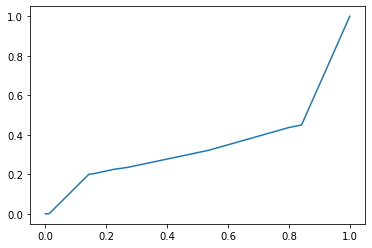

In [73]:
#Displaying the ROC curve 
plt.plot(false_positive_rate,true_positive_rate)

CONCLUSION:

In this assignment, we have used the CIFAR-10 dataset.The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class.The dataset is divided into five training batches and one test batch, each with 10000 images.

We have used the first data batch for training the models and the test batch to test the models.The images are converted to a 2D array and passed to the independent variable X as shown above.This array contains the pixel details of the image.
The dependent variable is the Label which ranges from 0-9 representing different classes of images.

The Random forest classifier gives an accuracy of 42% compared to the aaccuracy of KNN classifier which is 29%. The performance of the models is described with the help of classifiation report,Confusion matrix and ROC curves.

Thus, The Random Forest Classifier is a better choice to use for the application of image classification.